In [16]:
import pandas as pd
import numpy as np

In [18]:
cost_per_transaction = "Data/cost-per-transaction.json"
difficulty = "Data/difficulty.json"
hash_rate = "Data/hash-rate.json"
market_price = "Data/market-price.json"
miners_revenue = "Data/miners-revenue.json"
n_transactions_total = "Data/n-transactions-total.json"
output_volume = "Data/output-volume.json"

## Convert all Json files to CSV

In [20]:
import json

# Read the JSON file
with open(cost_per_transaction, "r") as f:
    data = json.load(f)

# Extract the "cost-per-transaction" data
cost_per_transaction_data = data.get("cost-per-transaction", [])

# Create a DataFrame from the extracted data
df = pd.DataFrame(cost_per_transaction_data)

# Rename columns
df.rename(columns={"x": "time", "y": "cost_per_transaction"}, inplace=True)

# Define the output CSV file path
output_csv = "CSV/cost_per_transaction.csv"

# Save the DataFrame to a CSV file without the index
df.to_csv(output_csv, index=False)

# ======================================================

with open(difficulty, "r") as f:
    data = json.load(f)

# Extract the "cost-per-transaction" data
difficulty_json_data = data.get("difficulty", [])

# Create a DataFrame from the extracted data
df = pd.DataFrame(difficulty_json_data)

# Rename columns
df.rename(columns={"x": "time", "y": "difficulty"}, inplace=True)

# Define the output CSV file path
output_csv = "CSV/difficulty.csv"

# Save the DataFrame to a CSV file without the index
df.to_csv(output_csv, index=False)


In [21]:
with open(hash_rate, "r") as f:
    data = json.load(f)

# Extract the "cost-per-transaction" data
hash_rate_json_data = data.get("hash-rate", [])

# Create a DataFrame from the extracted data
df = pd.DataFrame(hash_rate_json_data)

# Rename columns
df.rename(columns={"x": "time", "y": "hash_rate"}, inplace=True)

# Define the output CSV file path
output_csv = "CSV/hash_rate.csv"

# Save the DataFrame to a CSV file without the index
df.to_csv(output_csv, index=False)

In [22]:
with open(market_price, "r") as f:
    data = json.load(f)

# Extract the "cost-per-transaction" data
market_price_data = data.get("market-price", [])

# Create a DataFrame from the extracted data
df = pd.DataFrame(market_price_data)

# Rename columns
df.rename(columns={"x": "time", "y": "market_price"}, inplace=True)

# Define the output CSV file path
output_csv = "CSV/market_price.csv"

# Save the DataFrame to a CSV file without the index
df.to_csv(output_csv, index=False)

In [23]:

with open(miners_revenue, "r") as f:
    data = json.load(f)

# Extract the "cost-per-transaction" data
miners_revenue_json_data = data.get("miners-revenue", [])

# Create a DataFrame from the extracted data
df = pd.DataFrame(miners_revenue_json_data)

# Rename columns
df.rename(columns={"x": "time", "y": "miners_revenue"}, inplace=True)

# Define the output CSV file path
output_csv = "CSV/miners_revenue.csv"

# Save the DataFrame to a CSV file without the index
df.to_csv(output_csv, index=False)

In [24]:

with open(n_transactions_total, "r") as f:
    data = json.load(f)

# Extract the "cost-per-transaction" data
n_transactions_json_data = data.get("n-transactions-total", [])

# Create a DataFrame from the extracted data
df = pd.DataFrame(n_transactions_json_data)

# Rename columns
df.rename(columns={"x": "time", "y": "n_transactions_total"}, inplace=True)

# Define the output CSV file path
output_csv = "CSV/n_transactions_total.csv"

# Save the DataFrame to a CSV file without the index
df.to_csv(output_csv, index=False)

In [25]:

with open(output_volume, "r") as f:
    data = json.load(f)

# Extract the "cost-per-transaction" data
output_volume_json_data = data.get("output-volume", [])

# Create a DataFrame from the extracted data
df = pd.DataFrame(output_volume_json_data)

# Rename columns
df.rename(columns={"x": "time", "y": "output_volume"}, inplace=True)

# Define the output CSV file path
output_csv = "CSV/output_volume.csv"

# Save the DataFrame to a CSV file without the index
df.to_csv(output_csv, index=False)

## Merge all Dataframes

In [ ]:
#merged_df.head(10)

In [41]:
pd.read_csv("CSV/hash_rate.csv")

time     hash_rate
0     1600473600000  1.431375e+08
1     1600560000000  1.405507e+08
2     1600646400000  1.399045e+08
3     1600732800000  1.381130e+08
4     1600819200000  1.365906e+08
...             ...           ...
1089  1694563200000  3.893063e+08
1090  1694649600000  3.937745e+08
1091  1694736000000  3.999273e+08
1092  1694822400000  4.210773e+08
1093  1694908800000  4.226155e+08

[1094 rows x 2 columns]

### Merging the dataframes

In [42]:
files = []
import os
for _,_, file in os.walk("."):
    for file_name in file:
        if file_name.endswith("csv"):
            files.append(file_name)

files

['cost_per_transaction.csv',
 'difficulty.csv',
 'hash_rate.csv',
 'market_price.csv',
 'miners_revenue.csv',
 'n_transactions_total.csv',
 'output_volume.csv']

In [52]:
#loopthrough list of names and merge

dataframe = None

for file in files:
    if dataframe is None:
        dataframe = pd.read_csv(f"C:\\Users\\user\\Desktop\\Blockchain Machine Learning\\CSV\\{file}",
                                                        names =["time",file.replace(".csv", "")])
    
    else:
        temporary_dataframe = pd.read_csv(f"C:\\Users\\user\\Desktop\\Blockchain Machine Learning\\CSV\\{file}",
                                          names = ["time", file.replace(".csv", "")])
        dataframe = pd.merge(dataframe, temporary_dataframe)

dataframe

time  cost_per_transaction          difficulty  \
0             time  cost_per_transaction          difficulty   
1    1663545600000     74.58137257450703  31761294403431.293   
2    1663632000000     72.03021518841977  31913909804123.152   
3    1663718400000     71.48232535080409    32045359565303.0   
4    1663804800000     72.15209161578727    32045359565303.0   
..             ...                   ...                 ...   
360  1694563200000     48.74838982424341  54171939432738.516   
361  1694649600000     49.03451036067698    54150142369480.0   
362  1694736000000     49.39630965605097    54150142369480.0   
363  1694822400000     48.11729206487348    54150142369480.0   
364  1694908800000     48.44830167206572    54150142369480.0   

              hash_rate        market_price      miners_revenue  \
0             hash_rate        market_price      miners_revenue   
1     229154215.6133512  20597.764285714286  19038260.943038963   
2    225080869.65342325  20257.955714285716  18246624.017179776   
3    229389618.86922815            19850.74  18199039.608526625   
4    232575585.79796743   19666.08285714286  18292503.807414036   
..                  ...                 ...                 ...   
360   389306277.0156265   25796.84857142858   24213824.03953768   
361   393774544.8476787  25804.048571428582  24539876.486694556   
362   399927272.1109237  25871.858571428584  24996419.757744055   
363   421077272.0783283   25913.65142857144  26344834.022260983   
364   422615453.8941396   26013.61142857144  26515397.297244817   

     n_transactions_total       output_volume  
0    n_transactions_total       output_volume  
1             764577385.0   2980653.486675398  
2       764834334.4285715  3326877.4834680036  
3             765088723.0   3562166.124891725  
4             765344766.0   3573297.100791396  
..                    ...                 ...  
360           891264919.0   683228.0461584242  
361           891767045.0   680001.2110142937  
362     892272993.7142857   689992.1467834839  
363           892784310.0   721149.5258490077  
364           893337264.0   734657.1654605808  

[365 rows x 8 columns]

In [53]:
dataframe = dataframe[1:]
dataframe

time cost_per_transaction          difficulty  \
1    1663545600000    74.58137257450703  31761294403431.293   
2    1663632000000    72.03021518841977  31913909804123.152   
3    1663718400000    71.48232535080409    32045359565303.0   
4    1663804800000    72.15209161578727    32045359565303.0   
5    1663891200000    71.45164887129333    32045359565303.0   
..             ...                  ...                 ...   
360  1694563200000    48.74838982424341  54171939432738.516   
361  1694649600000    49.03451036067698    54150142369480.0   
362  1694736000000    49.39630965605097    54150142369480.0   
363  1694822400000    48.11729206487348    54150142369480.0   
364  1694908800000    48.44830167206572    54150142369480.0   

              hash_rate        market_price      miners_revenue  \
1     229154215.6133512  20597.764285714286  19038260.943038963   
2    225080869.65342325  20257.955714285716  18246624.017179776   
3    229389618.86922815            19850.74  18199039.608526625   
4    232575585.79796743   19666.08285714286  18292503.807414036   
5    228251773.53753558  19421.484285714287  17818669.842569757   
..                  ...                 ...                 ...   
360   389306277.0156265   25796.84857142858   24213824.03953768   
361   393774544.8476787  25804.048571428582  24539876.486694556   
362   399927272.1109237  25871.858571428584  24996419.757744055   
363   421077272.0783283   25913.65142857144  26344834.022260983   
364   422615453.8941396   26013.61142857144  26515397.297244817   

    n_transactions_total       output_volume  
1            764577385.0   2980653.486675398  
2      764834334.4285715  3326877.4834680036  
3            765088723.0   3562166.124891725  
4            765344766.0   3573297.100791396  
5      765599583.8571428   3487345.879231925  
..                   ...                 ...  
360          891264919.0   683228.0461584242  
361          891767045.0   680001.2110142937  
362    892272993.7142857   689992.1467834839  
363          892784310.0   721149.5258490077  
364          893337264.0   734657.1654605808  

[364 rows x 8 columns]

In [55]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 1 to 364
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   time                  364 non-null    object
 1   cost_per_transaction  364 non-null    object
 2   difficulty            364 non-null    object
 3   hash_rate             364 non-null    object
 4   market_price          364 non-null    object
 5   miners_revenue        364 non-null    object
 6   n_transactions_total  364 non-null    object
 7   output_volume         364 non-null    object
dtypes: object(8)
memory usage: 22.9+ KB


In [58]:
# dataframe["time"] = pd.to_datetime(dataframe["time"], format="%Y-%m-%d %H:%M:%S")

# dataframe.info()

dataframe.loc[:, "time"] = pd.to_datetime(dataframe["time"], unit='ms')
dataframe.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 1 to 364
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  364 non-null    datetime64[ns]
 1   cost_per_transaction  364 non-null    object        
 2   difficulty            364 non-null    object        
 3   hash_rate             364 non-null    object        
 4   market_price          364 non-null    object        
 5   miners_revenue        364 non-null    object        
 6   n_transactions_total  364 non-null    object        
 7   output_volume         364 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 22.9+ KB


convert objects to numeric types

In [59]:
dataframe = dataframe.apply(pd.to_numeric,
                            errors="coerce")

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 1 to 364
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  364 non-null    int64  
 1   cost_per_transaction  364 non-null    float64
 2   difficulty            364 non-null    float64
 3   hash_rate             364 non-null    float64
 4   market_price          364 non-null    float64
 5   miners_revenue        364 non-null    float64
 6   n_transactions_total  364 non-null    float64
 7   output_volume         364 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 22.9 KB


In [60]:
dataframe

time  cost_per_transaction    difficulty     hash_rate  \
1    1663545638912000000             74.581373  3.176129e+13  2.291542e+08   
2    1663632015360000000             72.030215  3.191391e+13  2.250809e+08   
3    1663718391808000000             71.482325  3.204536e+13  2.293896e+08   
4    1663804768256000000             72.152092  3.204536e+13  2.325756e+08   
5    1663891144704000000             71.451649  3.204536e+13  2.282518e+08   
..                   ...                   ...           ...           ...   
360  1694563172352000000             48.748390  5.417194e+13  3.893063e+08   
361  1694649548800000000             49.034510  5.415014e+13  3.937745e+08   
362  1694736056320000000             49.396310  5.415014e+13  3.999273e+08   
363  1694822432768000000             48.117292  5.415014e+13  4.210773e+08   
364  1694908809216000000             48.448302  5.415014e+13  4.226155e+08   

     market_price  miners_revenue  n_transactions_total  output_volume  
1    20597.764286    1.903826e+07          7.645774e+08   2.980653e+06  
2    20257.955714    1.824662e+07          7.648343e+08   3.326877e+06  
3    19850.740000    1.819904e+07          7.650887e+08   3.562166e+06  
4    19666.082857    1.829250e+07          7.653448e+08   3.573297e+06  
5    19421.484286    1.781867e+07          7.655996e+08   3.487346e+06  
..            ...             ...                   ...            ...  
360  25796.848571    2.421382e+07          8.912649e+08   6.832280e+05  
361  25804.048571    2.453988e+07          8.917670e+08   6.800012e+05  
362  25871.858571    2.499642e+07          8.922730e+08   6.899921e+05  
363  25913.651429    2.634483e+07          8.927843e+08   7.211495e+05  
364  26013.611429    2.651540e+07          8.933373e+08   7.346572e+05  

[364 rows x 8 columns]

## Visualization

In [62]:
columns =list(dataframe.columns)
columns

['time',
 'cost_per_transaction',
 'difficulty',
 'hash_rate',
 'market_price',
 'miners_revenue',
 'n_transactions_total',
 'output_volume']

In [63]:
columns.remove("time")
columns

['cost_per_transaction',
 'difficulty',
 'hash_rate',
 'market_price',
 'miners_revenue',
 'n_transactions_total',
 'output_volume']

In [65]:
import matplotlib.pyplot as plt

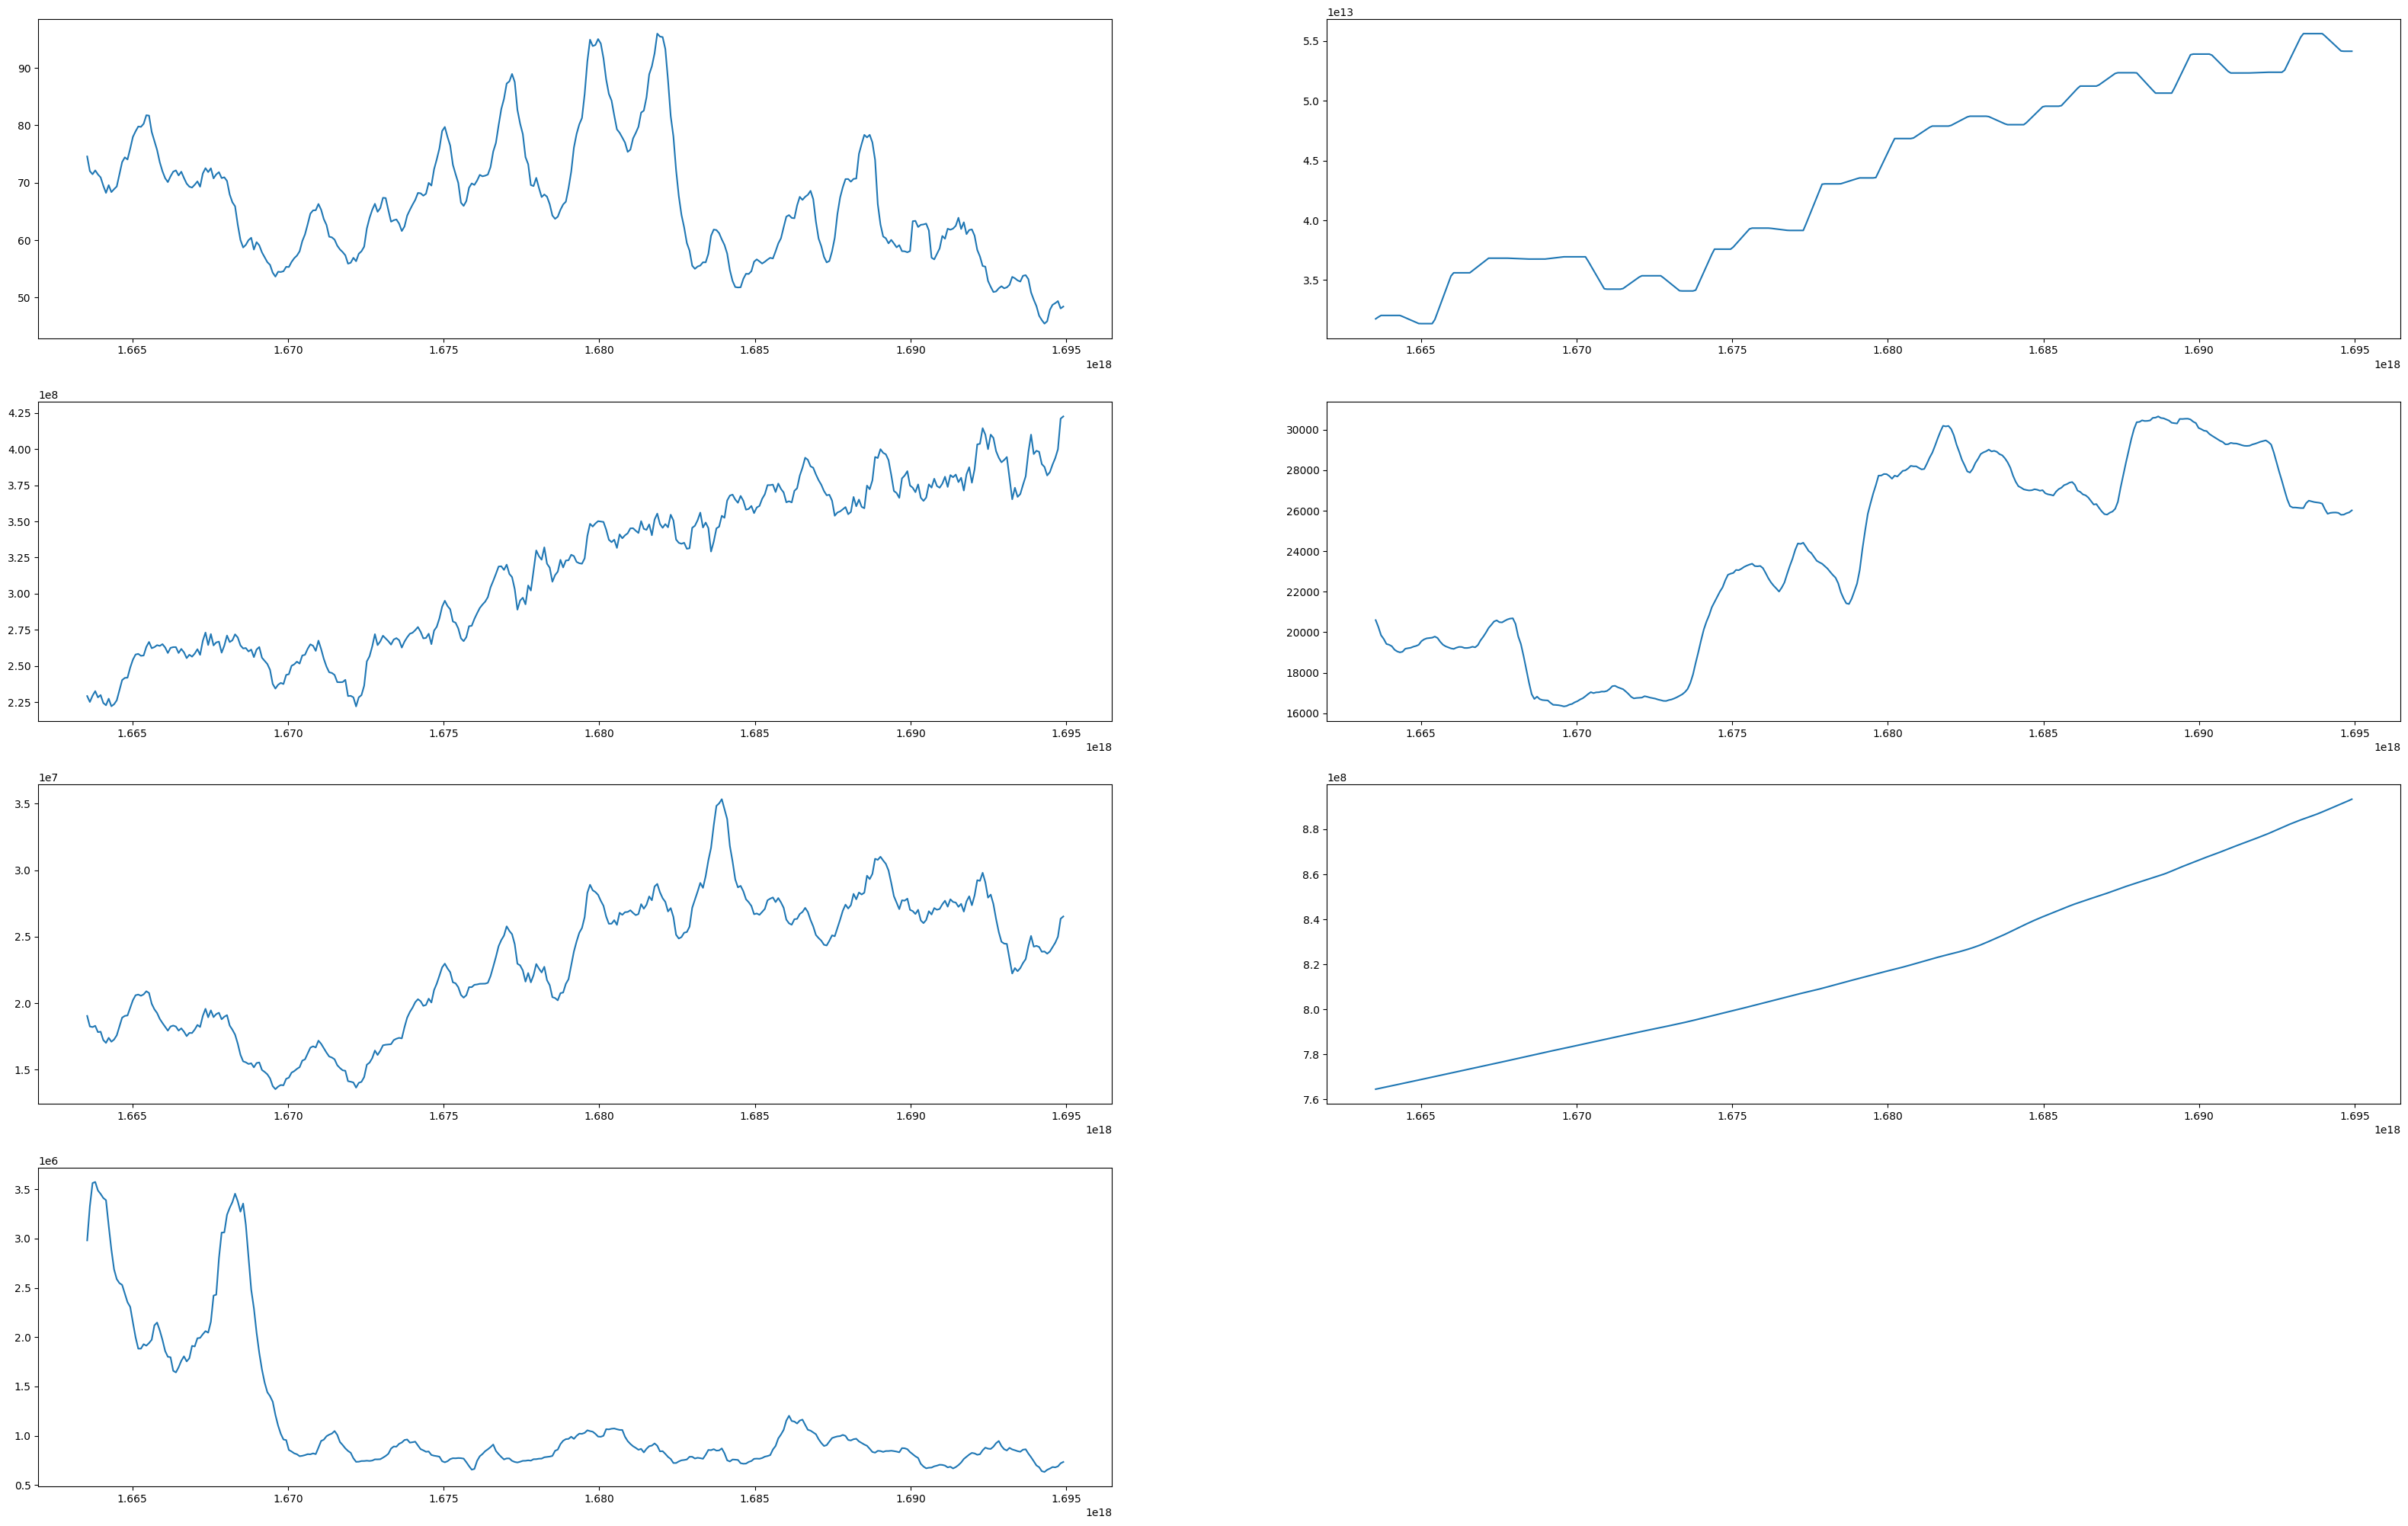

In [67]:
fig = plt.figure(figsize=(40,25))

COLUMNS = 2

ROWS = 4

for index in range(len(columns)):
    fig.add_subplot(ROWS, COLUMNS, index + 1)

    current_feature = columns[index]

    plt.plot(dataframe["time"],
             dataframe[current_feature])
    
plt.show()
    



## Defining X and y

In [84]:
NUMBER_OF_TRANSACTIONS_INDEX = 6

END_RANGE = NUMBER_OF_TRANSACTIONS_INDEX + 1

X = dataframe.iloc[:, NUMBER_OF_TRANSACTIONS_INDEX :END_RANGE]

X

"""X = dataframe["n_transactions_total"]
X"""

'X = dataframe["n_transactions_total"]\nX'

In [86]:

MARKET_PRICE_INDEX = 4
y = dataframe.iloc[:, MARKET_PRICE_INDEX]
y

1      20597.764286
2      20257.955714
3      19850.740000
4      19666.082857
5      19421.484286
           ...     
360    25796.848571
361    25804.048571
362    25871.858571
363    25913.651429
364    26013.611429
Name: market_price, Length: 364, dtype: float64

In [85]:
X = X.values
X

array([[7.64577385e+08],
       [7.64834334e+08],
       [7.65088723e+08],
       [7.65344766e+08],
       [7.65599584e+08],
       [7.65849582e+08],
       [7.66102678e+08],
       [7.66353144e+08],
       [7.66603255e+08],
       [7.66854509e+08],
       [7.67105805e+08],
       [7.67357434e+08],
       [7.67612137e+08],
       [7.67867750e+08],
       [7.68125051e+08],
       [7.68382862e+08],
       [7.68642542e+08],
       [7.68903341e+08],
       [7.69164723e+08],
       [7.69427648e+08],
       [7.69687975e+08],
       [7.69947704e+08],
       [7.70206931e+08],
       [7.70463737e+08],
       [7.70718974e+08],
       [7.70973363e+08],
       [7.71228382e+08],
       [7.71485433e+08],
       [7.71743153e+08],
       [7.72001198e+08],
       [7.72259801e+08],
       [7.72516898e+08],
       [7.72774292e+08],
       [7.73029324e+08],
       [7.73282204e+08],
       [7.73534078e+08],
       [7.73786534e+08],
       [7.74039540e+08],
       [7.74291468e+08],
       [7.74549422e+08],


In [87]:
y = y.values
y

array([20597.76428571, 20257.95571429, 19850.74      , 19666.08285714,
       19421.48428571, 19380.61857143, 19308.18571429, 19138.05428571,
       19051.17571429, 19006.18428571, 19038.31714286, 19184.51      ,
       19211.68571429, 19232.63142857, 19287.33142857, 19321.90428571,
       19379.81142857, 19556.57714286, 19647.58857143, 19698.67857143,
       19715.48142857, 19730.20142857, 19786.22428571, 19714.78285714,
       19530.12428571, 19385.61285714, 19303.73285714, 19252.28857143,
       19201.62714286, 19176.43428571, 19235.92714286, 19276.08428571,
       19271.71857143, 19223.64714286, 19221.73714286, 19242.07285714,
       19284.98428571, 19254.97428571, 19365.05      , 19600.29428571,
       19777.67857143, 19982.00571429, 20212.10714286, 20363.90571429,
       20529.67571429, 20584.67428571, 20496.33571429, 20484.85571429,
       20563.61285714, 20631.68571429, 20673.37571429, 20687.54      ,
       20409.51857143, 19795.65571429, 19415.95142857, 18821.28428571,
      

In [88]:
X.size

364

In [89]:
y.size

364

## Building Linear Regression Model

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
model = LinearRegression()

In [92]:
model.fit(X,y)

LinearRegression()

### Plotting scatterplot

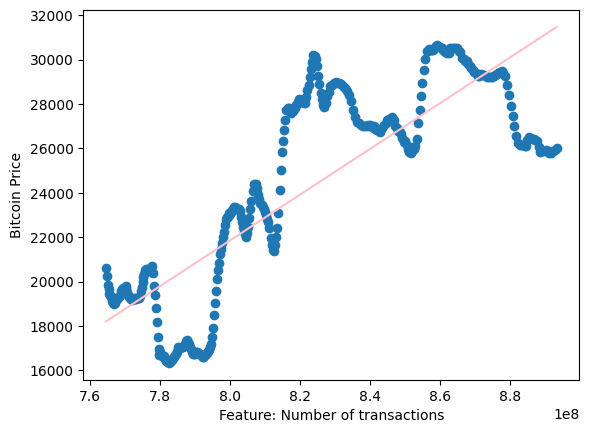

In [96]:
plt.scatter(X,y)
plt.ylabel("Bitcoin Price")
plt.xlabel("Feature: Number of transactions")

#add regression line
plt.plot(X, model.predict(X), color ="pink")

## Polynomial Regression

In [97]:
from sklearn.preprocessing import PolynomialFeatures

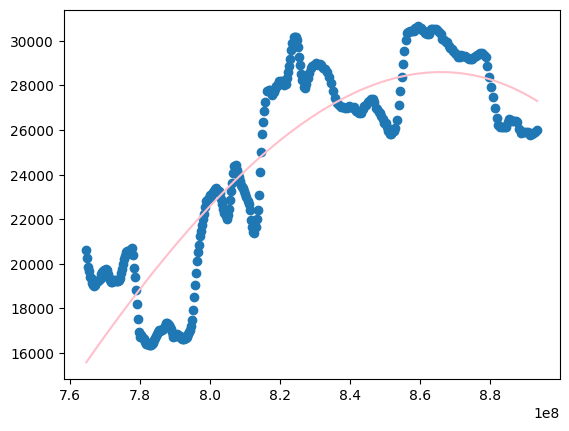

In [101]:
X_DEGREE = 5

polynomial_features = PolynomialFeatures(degree=X_DEGREE)

X_polynomial = polynomial_features.fit_transform(X)

polynomial_features.fit(X_polynomial, y)

linear_model = LinearRegression()

linear_model.fit(X_polynomial, y)

plt.scatter(X, y)

plt.plot(X, linear_model.predict(polynomial_features.fit_transform(X)),
         color="pink")

